<a href="https://colab.research.google.com/github/JosephValencia725/Machine-Learning/blob/main/x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muestra de los tweets recolectados:
            id_usuario                                          contenido  \
0  1791496941559328768  3. XIX: giro anatomoclínico y estadístico.\n4....   
1  1377735877804326917  Goldman Sachs advierte que el gasto de capital...   
2   920961873910075392  El próximo 8 de octubre se celebrará el evento...   
3  1683066124689190913  @kallaico @PeculiarPi47155 @AVE_CyL @LaRegion ...   
4           3164545831  @SancadillaNorte Que raro para @Pellomaldonado...   

                 fecha_hora  
0 2025-09-14 13:48:06+00:00  
1 2025-09-14 13:14:16+00:00  
2 2025-09-14 10:00:01+00:00  
3 2025-09-14 07:31:33+00:00  
4 2025-09-14 05:01:02+00:00  

✅ Datos guardados exitosamente en formato Parquet

Tweets con clasificación de sentimientos:
            id_usuario                                          contenido  \
0  1791496941559328768  3. XIX: giro anatomoclínico y estadístico.\n4....   
1  1377735877804326917  Goldman Sachs advierte que el gasto de capital...

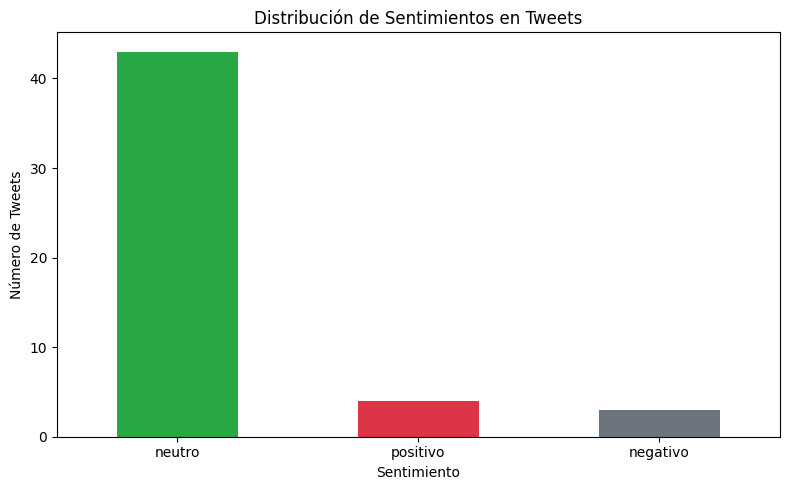

In [1]:
# =========================================
# 🌟 Análisis de Sentimientos en Twitter/X
# Taller de Procesamiento de Big Data
# =========================================

!pip install tweepy textblob pyarrow

import tweepy
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# ==============================
# 1. Configuración de Autenticación con la API
# ==============================
# 🔑 Ingresa tu Bearer Token desde developer.x.com
TOKEN_API = "AAAAAAAAAAAAAAAAAAAAAHHJ4AEAAAAAgRwku5a0P0UrrsHq0fxB9W1QNDY%3D4kwnmFdMuIpdze1EyvVe1qaURD3G4Da4UAWKK3ENwxQUoPKy6F"

# Inicializar cliente de la API de Twitter/X
cliente_api = tweepy.Client(bearer_token=TOKEN_API)

# ==============================
# 2. Obtención de Tweets
# ==============================
consulta = "Big Data lang:es -is:retweet"  # Tweets en español, sin retweets

# Obtener tweets recientes
respuesta = cliente_api.search_recent_tweets(
    query=consulta,
    max_results=50,
    tweet_fields=["author_id", "created_at", "lang"]
)

# Almacenar datos de los tweets
lista_tweets = []
for tweet in respuesta.data:
    lista_tweets.append({
        "id_usuario": tweet.author_id,
        "contenido": tweet.text,
        "fecha_hora": tweet.created_at
    })

# Convertir a DataFrame
df_tweets = pd.DataFrame(lista_tweets)
print("Muestra de los tweets recolectados:")
print(df_tweets.head())

# ==============================
# 3. Guardar en Formato Parquet
# ==============================
df_tweets.to_parquet("datos_tweets.parquet", engine="pyarrow", index=False)
print("\n✅ Datos guardados exitosamente en formato Parquet")

# ==============================
# 4. Análisis de Sentimientos
# ==============================
def clasificar_sentimiento(texto):
    polaridad = TextBlob(texto).sentiment.polarity
    if polaridad > 0:
        return "positivo"
    elif polaridad < 0:
        return "negativo"
    else:
        return "neutro"

# Aplicar análisis de sentimientos
df_tweets["sentimiento"] = df_tweets["contenido"].apply(clasificar_sentimiento)
print("\nTweets con clasificación de sentimientos:")
print(df_tweets.head())

# ==============================
# 5. Visualización de Resultados
# ==============================
# Contar sentimientos y generar gráfico de barras
conteo_sentimientos = df_tweets["sentimiento"].value_counts()

# Crear gráfico
plt.figure(figsize=(8, 5))
conteo_sentimientos.plot(kind="bar", color=["#28a745", "#dc3545", "#6c757d"])
plt.title("Distribución de Sentimientos en Tweets")
plt.xlabel("Sentimiento")
plt.ylabel("Número de Tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()